<a href="https://colab.research.google.com/github/AlphonsaSabu/CODSOFT/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SALES PREDICTION**

Importing all needed libraries.

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [109]:
#Loading data.
df=pd.read_csv('/content/advertising (2).csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [110]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [111]:
df.shape

(200, 4)

In [112]:
df.info()
#It will provide information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [113]:
df.describe()
#it will give statistical informations about data.

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**DATA PREPROCESSING**

In [114]:
#Finding missing values.
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [115]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

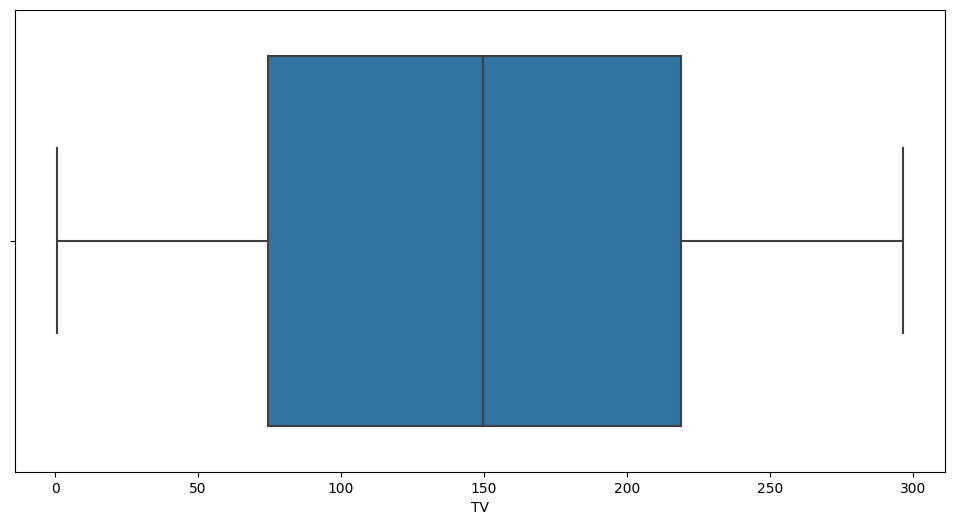

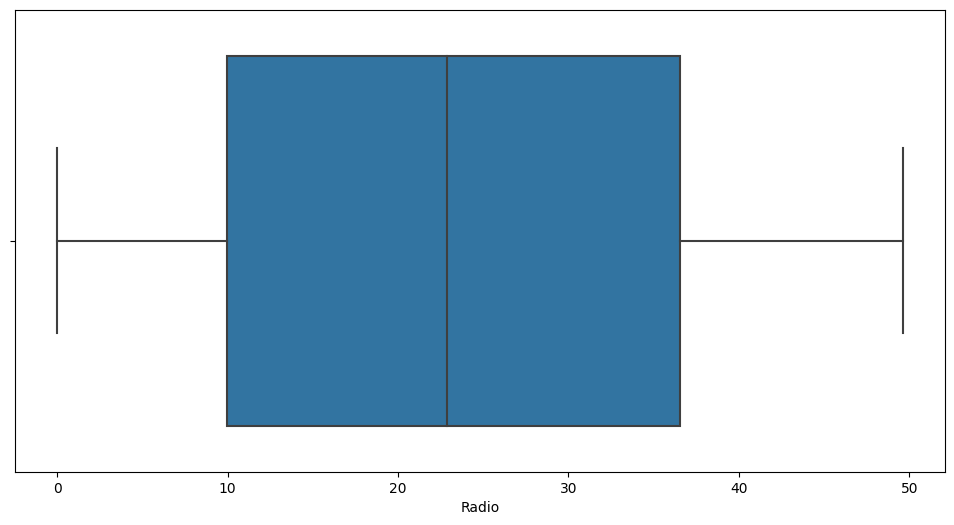

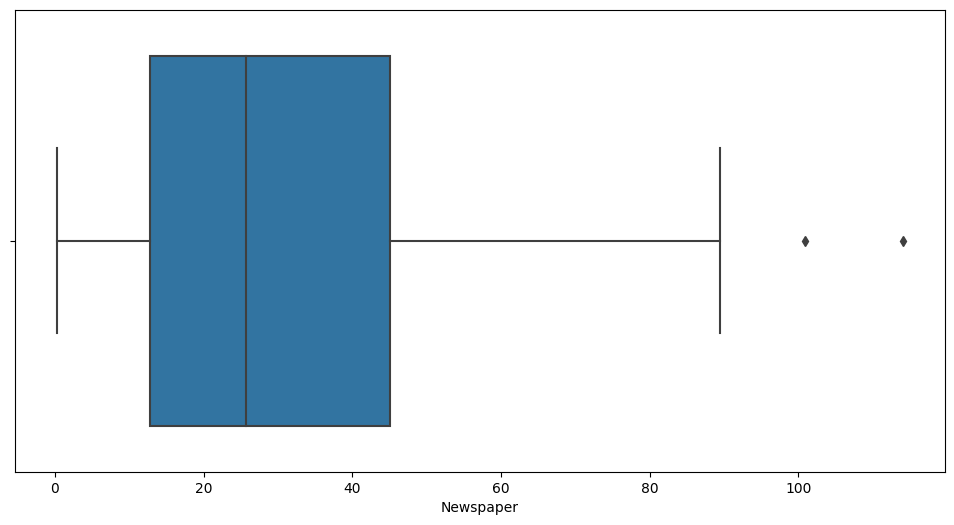

In [116]:
#finding outliers.
for i in ['TV', 'Radio', 'Newspaper']:
  plt.figure(figsize=(12,6))
  sns.boxplot(x=df[i])
  plt.xlabel(i)

In [117]:
Q1=df['Newspaper'].quantile(0.25)
Q3=df['Newspaper'].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outliers=df[(df['Newspaper']<lower_bound) | (df['Newspaper']>upper_bound)]
outliers

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [118]:
df=df.drop([16,101],axis=0)
df.shape
#drpped the outliers.

(198, 4)

<Axes: xlabel='Newspaper'>

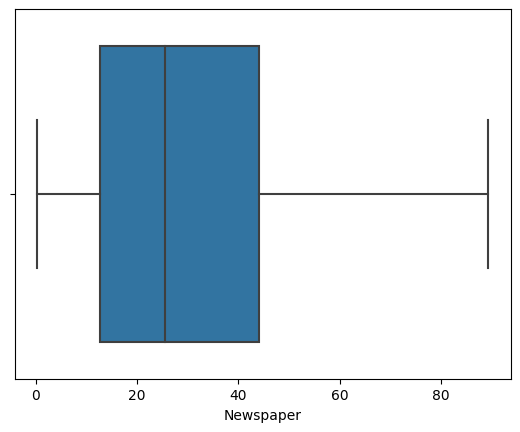

In [119]:
sns.boxplot(x='Newspaper',data=df)

<Axes: >

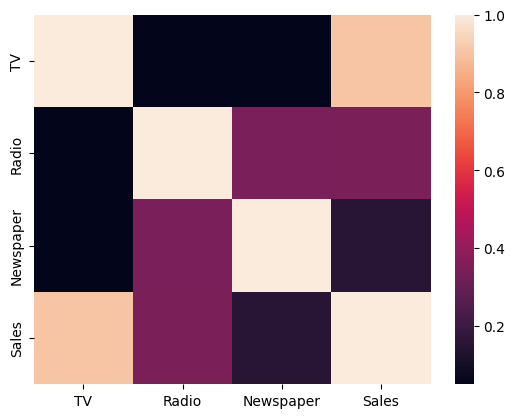

In [121]:
#finding the relationshp between input and output variables.
sns.heatmap(df.corr())

In [122]:
#taking threshold=0,5,then we droppincolumns which have correlation less than threshold
df.drop(['Newspaper','Radio'],axis=1)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [123]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [125]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 8.73969911, 13.75335674, 24.26389703, 11.16892835,  9.50004235,
       21.24519808, 20.14018828, 12.84035266, 15.05911045, 20.84351926,
       15.97502712, 20.46105223,  8.33229443, 13.96351058,  8.91254222,
       10.81480272,  9.56597467, 15.74521707,  9.81079412, 11.60048512,
       12.78415132, 17.05650468, 23.49039705,  7.0915867 , 18.56528679,
       20.87167705,  8.42400623, 18.53046438,  7.50501077, 14.88068637,
       18.7516656 , 14.02820959,  8.95890606, 13.14928652, 19.16988387,
       17.70215559, 16.80809561, 14.41227827, 19.68628284, 17.60911962,
       18.83005652, 10.94596006, 13.57079614, 10.35155019,  7.40156599,
        7.85517472, 16.56186863, 17.92963578, 10.24287104, 23.22758852,
       17.85870892, 16.77473452, 20.10467498,  7.15728689,  6.47057843,
       15.51181495, 11.82344571, 23.57266497, 13.38245303, 12.35015635])

In [126]:
mape=mean_absolute_percentage_error(y_test,y_pred)
mape

0.0973419889178368

This have only  less errors.

In [127]:
#Finding coefficient of determination
cor=r2_score(y_test,y_pred)
cor

0.9151626818586047

It have greater r2 score. So this model predict well.